In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%matplotlib inline

[2021-11-25 09:04:06,378 | DEBUG]	Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [9]:
import matplotlib.pyplot as plt
import networkx as nx   # install it if missing: !pip install networkx

In [10]:
from src.config.config import get_config
from src.context import context

In [11]:
context.environment = 'development'  # or 'dev', depends on your config files
context.config = get_config(context)

In [12]:
def draw_graph(graph, *, ax=None, save_path=None):
    if ax is None:
        ax = plt.axes()
    # NOTE: 
    # We need `.reverse` here because we have reversed
    # our adjacency list for convenience. You shouldn't
    # care about that detail.
    nx_graph = nx.DiGraph(graph.edges).reverse()
    nx.draw_networkx(nx_graph, ax=ax)
    if save_path is not None:
        ax.figure.savefig(save_path)

    return ax

In [13]:
from src.training.data import build_dataset  # the graph used for testing
graph = build_dataset()

[2021-11-25 09:04:16,417 | INFO]	Loading data catalog...
[2021-11-25 09:04:17,090 | INFO]	Data catalog loaded. ✅


/usr/local/anaconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/anaconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
[2021-11-25 09:04:18,392 | DEBUG]	findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
[2021-11-25 09:04:18,398 | DEBUG]	findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
[2021-11-25 09:04:18,404 | DEBUG]	findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
[2021-11-25 09:04:18,406 | DEBUG]	findfont: score(<Font 'STIXGeneral' (S

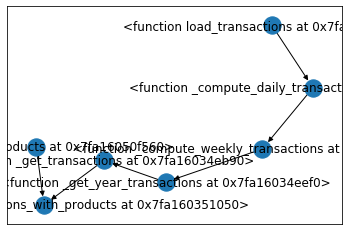

In [14]:
draw_graph(graph);

In [15]:
from src.libs.dag.utils import map_adjacency

In [16]:
def draw_graph(graph, *, ax=None, save_path=None):
    if ax is None:
        ax = plt.axes()

    # We use our utils function here: using the __name__
    # special attributes that is attached to every Python
    # functions or classes.
    adjacency = map_adjacency(lambda f: f.__name__, graph.edges)
    print(adjacency)
    nx_graph = nx.DiGraph(adjacency).reverse()
    nx.draw_networkx(nx_graph, ax=ax)
    if save_path is not None:
        ax.figure.savefig(save_path)
    return ax

{'_compute_daily_transactions': ['load_transactions'], '_compute_weekly_transactions': ['_compute_daily_transactions'], '_get_year_transactions': ['_compute_weekly_transactions'], '_get_transactions': ['_get_year_transactions'], '_merge_transactions_with_products': ['load_products', '_get_transactions']}


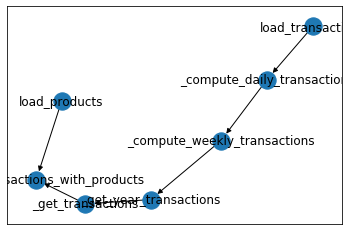

In [17]:
draw_graph(graph);

In [24]:
from pyvis.network import Network

In [55]:
def draw_graph(graph, *, path=None, backend='pyvis', ax=None):
    """
    Draw a graph using prefered backend.

    Args:
    -----
        graph: a `dag.graph.Graph` object
        path (Path|str): where to save the file (required for pyvis backend)
        backend: 'pyvis' or 'matplotlib'
        ax (matplotlib.pyplot.axes): optional for matplotlib
    """
    adjacency = map_adjacency(lambda f: f.__name__, graph.edges)
    nx_graph = nx.DiGraph(adjacency).reverse()
    
    if backend == 'matplotlib':
        if ax is None:
            ax = plt.axes()
        nx.draw_networkx(nx_graph, ax=ax)
        if path is not None:
            ax.figure.savefig(path)

        return ax

    elif backend == 'pyvis':
        assert path is not None, (
            "'path' is required if you're using pyvis backend."
        )
        net = Network(directed=True, notebook=True)
        net.from_nx(nx_graph)

        return net.show(str(path))

    else:
        raise NotImplementedError("Unknown backend.")

In [56]:
draw_graph(graph, path='graph.html')

In [57]:
def execute_graph(graph):
    for node in graph.topo_sorted():
        print(node)  # useless, but enough for now.

In [58]:
execute_graph(graph)

<function load_products at 0x7fa15fc26290>
<function load_transactions at 0x7fa15fb85dd0>
<function _compute_daily_transactions at 0x7fa15fc26680>
<function _compute_weekly_transactions at 0x7fa15fc26830>
<function _get_year_transactions at 0x7fa15fb17ef0>
<function _get_transactions at 0x7fa15fb17f80>
<function _merge_transactions_with_products at 0x7fa15fad4050>
<function _save_dataset at 0x7fa15fad4170>


In [59]:
def execute_graph(graph):
    for node in graph.topo_sorted():
        print(graph.get_node_dependencies(node))  # useless, but enough for now.

In [60]:
execute_graph(graph)

[]
[]
[<function load_transactions at 0x7fa15fb85dd0>]
[<function _compute_daily_transactions at 0x7fa15fc26680>]
[<function _compute_weekly_transactions at 0x7fa15fc26830>]
[<function _get_year_transactions at 0x7fa15fb17ef0>]
[<function load_products at 0x7fa15fc26290>, <function _get_transactions at 0x7fa15fb17f80>]
[<function _merge_transactions_with_products at 0x7fa15fad4050>]


[2021-11-25 10:38:29,183 | INFO]	Loading data catalog...
[2021-11-25 10:38:29,719 | INFO]	Data catalog loaded. ✅


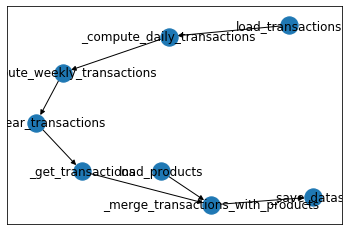

In [61]:
from src.training.data import build_dataset

graph = build_dataset()

# `draw_graph` was implemented in exercise 2
draw_graph(graph, path='graph.html')  # pyvis
# or
draw_graph(graph, backend='matplotlib');  # matplotlib

In [66]:
from src.libs.dag.executor import Executor

executor = Executor()
executor.execute(graph)  # graph = build_dataset()

[2021-11-25 10:39:30,038 | INFO]	Dataset saved at data/raw/dataset.csv
[2021-11-25 10:39:30,039 | INFO]	Successfully executed <src.libs.dag.graph.Graph object at 0x7fa15ff0fc90>.


In [67]:
l = [1,2,3]
def f(x):
    result = []
    for elt in x:
        result.append(elt+1)
    return result

In [68]:
f(l)

[2, 3, 4]

In [33]:
b = True
def f():
    if b :
        return{
        'products': 2,
        'transactions': 3
        }
    else:
        print('toto')

In [34]:
f()

{'products': 2, 'transactions': 3}

In [35]:
def f(x):
    return pow(x,2)

def g(x):
    return x/2

def h(z):
    return pow(z[0], 3) + pow(z[1], 3)

def identite(x, y):
    return (x, y)


x = 3
x_f = f(x)
x_g = g(x)

identity_func = identite(f(x), g(x))
# composition de la fonction identite avec la fonction h
x_f_g = h(identity_func)
x_f_g

732.375

In [36]:
def g(x):
    return x/2

In [37]:
def h(z):
    return pow(z[0], 3) + pow(z[1], 3)
    

In [38]:
def identite(x, y):
    return (x, y)


In [39]:
x = 3
x_f = f(x)
x_g = g(x)

identity_func = identite(f(x), g(x))
# composition de la fonction identite avec la fonction h
x_f_g = h(identity_func)
x_f_g

732.375

In [40]:
def identite(x, y):
    return x, y


In [41]:
identite(f(x), g(x))

(9, 1.5)

In [75]:
class Graph():
    def __init__(self, x):
        self.x = x
        self.states = {}
    def __repr__(self):
        return f'Graph({self.x})'
    def add_edge(self, source, target):
        

In [76]:
graph = Graph("gamma graph")
graph

Graph(gamma graph)